# <u>Part One: Network Models</u>

## 1. Watts-Strogatz Networks

<u> Question :</u> Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$.
<li>Calculate the average shortest path length $\langle d \rangle$ for each one. </li>
<li>Describe what happens to the network when $p = 1$.</li>

[18.702541082164327, 18.702541082164327, 18.702541082164327]


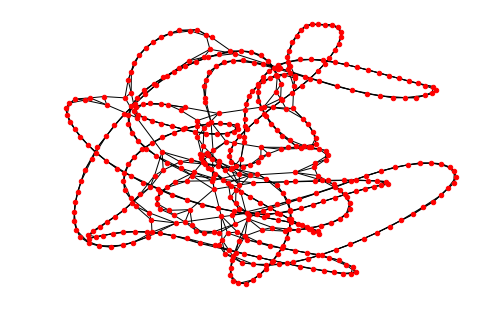

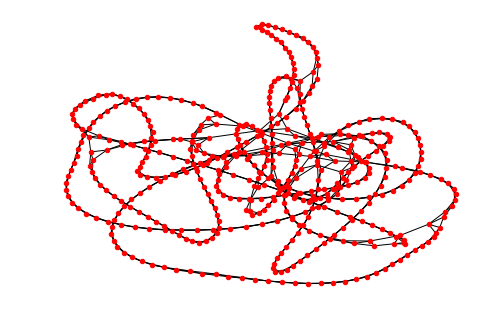

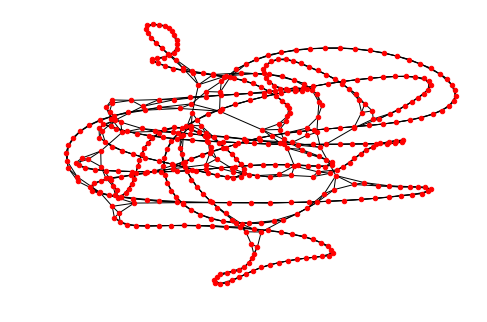

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

shortest_path_list = []
for i in range(3):
    plt.figure()
    G = nx.watts_strogatz_graph(500,4,0.01,1)
    nx.draw(G,node_size=20)
    shortest_path_list.append(nx.average_shortest_path_length(G))
    
print(shortest_path_list)

If $p = 1$ in the Watts-Strogatz model then it will be equivalent to Erdös-Rényi one, because each edge between nodes will be remove. Then each node will be randomly link to other nodes.

<u>Question :</u> Let's understand the behavior of the WS model as we increase p in more detail.. 
<li>Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$.</li>
<li>Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. </li>

In [11]:
import numpy as np
p_list = [0,0.01,0.03,0.05,0.1,0.2]
average_d = np.array([0,0,0,0,0,0])

for i in range(50):
    counter = 0
    for p in p_list:
        G = nx.watts_strogatz_graph(500,4,p,1)
        average_d[counter] += round(nx.average_shortest_path_length(G),2)
        counter += 1
        
print(average_d/50)

[62. 18. 12.  9.  7.  6.]


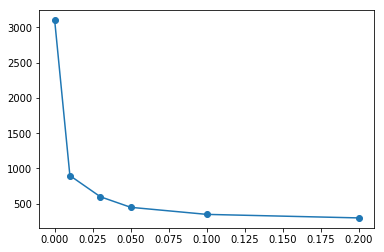

In [13]:
figure = plt.errorbar(p_list, average_d, yerr=0, marker='o')

# 2. The Barabasi-Albert Model

<u>Question :</u> Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

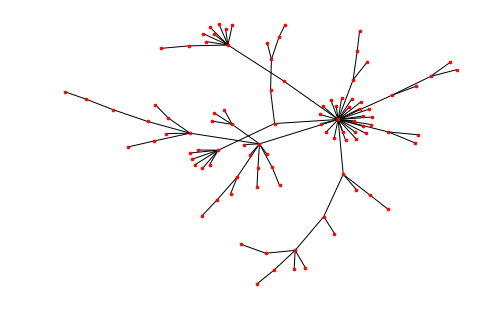

In [23]:
import random
import numpy as np

BA1 = nx.Graph()
BA1.add_nodes_from([1,2,3])
BA1.add_edge(1,2)
BA1.add_edge(2,3)

for i in range(4,100):
    a = np.array(BA1.edges())
    a = a.flatten()
    BA1.add_node(i)
    p = np.random.choice(a)
    BA1.add_edge(i,p)
    
nx.draw(BA1, node_size=7)

<u>Question :</u> Now create a 5000 node network.
<li>What's the maximum and minimum degree?</li>
<li>Now, bin the degree distribution, for example using numpy.histogram.</li>
<li>Plot the distribution. Plot it with both linear and log-log axes.</li>

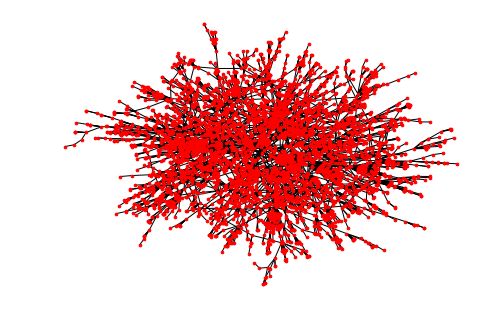

In [24]:
BA2 = nx.Graph()
BA2.add_nodes_from([1,2,3])
BA2.add_edge(1,2)
BA2.add_edge(2,3)

for i in range(4,5000):
    a = np.array(BA2.edges())
    a = a.flatten()
    BA2.add_node(i)
    p = np.random.choice(a)
    BA2.add_edge(i,p)
    
nx.draw(BA2, node_size=7)

In [41]:
degrees = BA2.degree()

deg = [k[1] for k in degrees]
maxDegree = max(deg)
minDegree = min(deg)

print("The maximum degree of the network is %s and the minimum one is %s." %(maxDegree, minDegree))

The maximum degree of the network is 204 and the minimum one is 1.


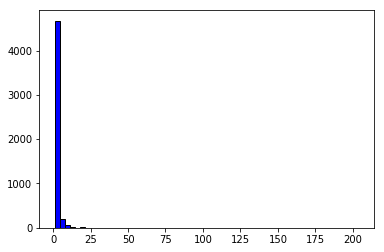

In [42]:
histogram = plt.hist(deg, color = 'blue', edgecolor = 'black', bins = int(180/3))